In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
from datetime import datetime

# Про перевозки

In [2]:
taxi = pd.read_csv('https://stepik.org/media/attachments/lesson/360340/2_taxi_nyc.csv')
taxi = taxi.rename(columns={'pcp 01': 'pcp_01', 'pcp 06': 'pcp_06', 'pcp 24': 'pcp_24'})
display(taxi.head())
taxi.query("borough == 'Brooklyn'").shape[0]

,pickup_dt,pickup_month,borough,pickups,hday,spd,vsb,temp,dewp,slp,pcp_01,pcp_06,pcp_24,sd
0,2015-01-01 01:00:00,Jan,Bronx,152,Y,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0
1,2015-01-01 01:00:00,Jan,Brooklyn,1519,Y,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0
2,2015-01-01 01:00:00,Jan,EWR,0,Y,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0
3,2015-01-01 01:00:00,Jan,Manhattan,5258,Y,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0
4,2015-01-01 01:00:00,Jan,Queens,405,Y,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0


4343

In [3]:
min_pickups = taxi.groupby('borough').sum().pickups.idxmin()

In [4]:
taxi.groupby(['borough','hday']).mean().pickups.to_frame()

pickups
borough       hday             
Bronx         N       50.771073
              Y       48.065868
Brooklyn      N      534.727969
              Y      527.011976
EWR           N        0.023467
              Y        0.041916
Manhattan     N     2401.302921
              Y     2035.928144
Queens        N      308.899904
              Y      320.730539
Staten Island N        1.606082
              Y        1.497006

In [5]:
taxi.groupby(['borough','pickup_month']) \
.aggregate({'pickups':'sum'}).sort_values('pickups', ascending = False)

pickups
borough       pickup_month         
Manhattan     Jun           1995388
              May           1888800
              Feb           1718571
              Mar           1661261
              Apr           1648278
              Jan           1455543
Brooklyn      Jun            482466
              May            476087
              Apr            378095
              Mar            346726
              Feb            328650
              Jan            309011
Queens        Jun            286311
              May            275893
              Mar            219561
              Apr            216857
              Feb            185695
              Jan            159211
Bronx         May             53037
              Jun             49006
              Apr             34617
              Mar             32232
              Feb             28694
              Jan             22461
Staten Island Jun              1673
              May              1517
              Apr              1068
              Mar               975
              Feb               903
              Jan               821
EWR           Jun                29
              May                27
              Mar                14
              Feb                14
              Jan                11
              Apr                10

In [6]:
taxi['temp_celsius'] = taxi.temp.apply(lambda x: (x-32)*5/9).round(2)
taxi.head()

,pickup_dt,pickup_month,borough,pickups,hday,spd,vsb,temp,dewp,slp,pcp_01,pcp_06,pcp_24,sd,temp_celsius
0,2015-01-01 01:00:00,Jan,Bronx,152,Y,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,-1.11
1,2015-01-01 01:00:00,Jan,Brooklyn,1519,Y,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,-1.11
2,2015-01-01 01:00:00,Jan,EWR,0,Y,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,-1.11
3,2015-01-01 01:00:00,Jan,Manhattan,5258,Y,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,-1.11
4,2015-01-01 01:00:00,Jan,Queens,405,Y,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,-1.11


# Про отели

In [7]:
bookings = pd.read_csv('https://stepik.org/media/attachments/lesson/360344/bookings.csv', sep=';')
bookings.columns = bookings.columns.str.lower().str.replace(' ','_')
bookings.head()

,hotel,is_canceled,lead_time,arrival_full_date,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,adults,children,babies,meal,country,reserved_room_type,assigned_room_type,customer_type,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015-07-01,2015,July,27,1,0,0,...,2,0.0,0,BB,PRT,C,C,Transient,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015-07-01,2015,July,27,1,0,0,...,2,0.0,0,BB,PRT,C,C,Transient,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015-07-01,2015,July,27,1,0,1,...,1,0.0,0,BB,GBR,A,C,Transient,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015-07-01,2015,July,27,1,0,1,...,1,0.0,0,BB,GBR,A,A,Transient,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015-07-01,2015,July,27,1,0,2,...,2,0.0,0,BB,GBR,A,A,Transient,Check-Out,2015-07-03


In [8]:
#bookings.shape
#bookings.describe()
#bookings.info()

In [9]:
uspeh = bookings[bookings['is_canceled'] == 0]
uspeh.groupby('country').count().hotel.nlargest(5) #люди из этих стран сделали больше всего успешных бронирований

country
PRT    21071
GBR     9676
FRA     8481
ESP     6391
DEU     6069
Name: hotel, dtype: int64

In [10]:
bookings.groupby('hotel').mean().stays_total_nights.round(2)

hotel
City Hotel      2.98
Resort Hotel    4.32
Name: stays_total_nights, dtype: float64

In [11]:
bookings[bookings['assigned_room_type'] != bookings['reserved_room_type']].shape[0]

14917

In [12]:
bookings.groupby(['arrival_date_year', 'arrival_date_month']) \
.aggregate({'hotel':'count'}).sort_values('hotel', ascending = False)

hotel
arrival_date_year arrival_date_month       
2017              May                  6313
2016              October              6203
2017              April                5661
                  June                 5647
2016              May                  5478
                  April                5428
                  September            5394
2017              July                 5313
2016              June                 5292
2015              September            5114
2016              August               5063
2017              March                4970
2015              October              4957
2017              August               4925
2016              March                4824
                  July                 4572
                  November             4454
2017              February             4177
2016              February             3891
2015              August               3889
2016              December             3860
2017              January              3681
2015              December             2920
                  July                 2776
                  November             2340
2016              January              2248

In [13]:
bookings[bookings['hotel'] == 'City Hotel'].groupby(['arrival_date_year', 'arrival_date_month']) \
.aggregate({'is_canceled':'sum'}).sort_values('is_canceled', ascending = False)

is_canceled
arrival_date_year arrival_date_month             
2017              May                        2217
2016              October                    1947
2017              April                      1926
                  June                       1808
2016              June                       1720
                  September                  1567
2015              September                  1543
2016              April                      1539
                  May                        1436
                  November                   1360
2017              July                       1324
2015              October                    1321
2017              March                      1278
2016              August                     1247
2015              August                     1232
2017              August                     1123
2016              March                      1108
                  December                   1072
2017              January                    1044
2016              July                       1043
2017              February                    971
2015              July                        939
2016              February                    930
2015              December                    668
2016              January                     438
2015              November                    301

In [14]:
bookings[['adults', 'children', 'babies']].mean()

adults      1.856403
children    0.103890
babies      0.007949
dtype: float64

In [15]:
bookings['total_kids'] = bookings['children'] + bookings['babies'] 
bookings.groupby('hotel').aggregate({'total_kids':'mean'}).round(2)

,total_kids
hotel,
City Hotel,0.10
Resort Hotel,0.14


In [16]:
def deti(total_kids):
    if total_kids == 0:
        return False
    else:
        return True
    
bookings['had_kids'] = bookings.total_kids.apply(deti)
n = bookings.groupby('had_kids').aggregate({'hotel':'count', 'is_canceled':'sum'})
n['procent'] = n['is_canceled'] / n['hotel'] * 100
n.round(2)

,hotel,is_canceled,procent
had_kids,,,
False,110054,40961,37.22
True,9336,3263,34.95


# Всякое

In [17]:
names = 'Name1 Surname1, Name2 Surname2, Name3 Surname3'
names_list = names.split(', ')
names_list = pd.Series(names_list)
names_list.nunique()

3

In [18]:
df = pd.read_csv('https://stepik.org/media/attachments/lesson/359209/companies.csv', sep=';')
df.groupby('company').agg({'income':'mean'})

,income
company,
En +,9.962187e+10
"АО «Александрова, Савельев и Мельникова»",7.206782e+10
АО «Андреев-Анисимов»,6.931948e+09
АО «Андреев-Макарова»,8.934380e+10
АО «Большаков Кошелева»,7.860861e+10
...,...
Щекиноазот,4.309092e+10
Щукин Лимитед,6.703036e+10
Эйвон Бьюти Продактс Компани (Avon),2.503657e+10


# Такси

In [19]:
taxi = pd.read_csv('https://stepik.org/media/attachments/lesson/359240/taxi_peru.csv', sep = ';', 
                   parse_dates = ['start_at', 'end_at', 'arrived_at'])
taxi.head()

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaT,iPhone,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaT,iPhone,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0


In [20]:
new = taxi.groupby('source', as_index = False).agg({'journey_id':'count'})
new

,source,journey_id
0,Android,4909
1,Wap,136
2,iPad,571
3,iPhone,9741
4,web,7631


<AxesSubplot:xlabel='source', ylabel='journey_id'>

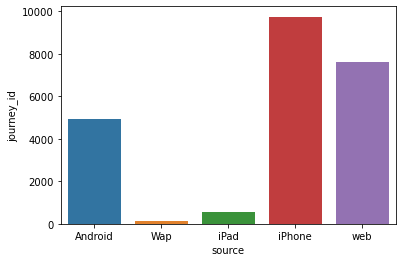

In [21]:
sns.barplot(x='source', y="journey_id", data=new)

<AxesSubplot:xlabel='icon', ylabel='count'>

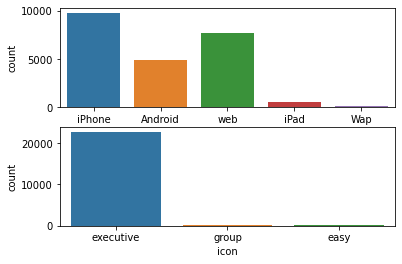

In [22]:
fig, axes = plt.subplots(2, 1)
sns.countplot(ax=axes[0], x = 'source', data = taxi)
sns.countplot(ax=axes[1], x = taxi.icon)

<AxesSubplot:xlabel='source', ylabel='count'>

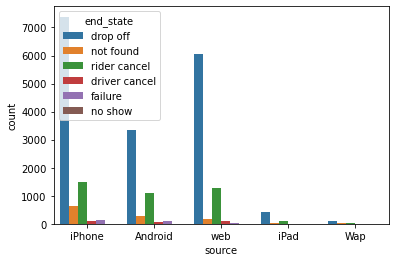

In [23]:
sns.countplot(x = 'source', hue = 'end_state', data = taxi)

In [24]:
chastota = taxi.groupby('driver_score', as_index = False).agg({'driver_id':'count'})
summa = chastota.driver_id.sum()
chastota['driver_id'] = chastota.driver_id.apply(lambda x: x/summa).mul(100).round(2)
driver_score_counts = chastota.rename(columns = {'driver_id':'percentage'})

driver_score_counts2 = taxi.driver_score.value_counts(normalize = True).mul(100).round(2)\
.reset_index().rename(columns = {'index':'driver_score','driver_score':'percentage'}).sort_values('driver_score')
display(driver_score_counts)
display(driver_score_counts2)
#одинаково

,driver_score,percentage
0,0.0,14.30
1,1.0,1.23
2,2.0,0.81
3,3.0,2.97
4,4.0,21.88
5,5.0,58.81


,driver_score,percentage
2,0.0,14.30
4,1.0,1.23
5,2.0,0.81
3,3.0,2.97
1,4.0,21.88
0,5.0,58.81


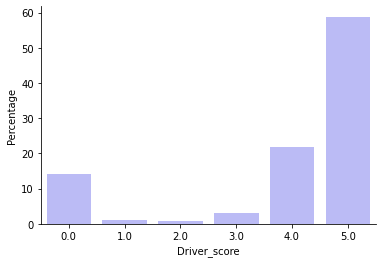

In [25]:
ax = sns.barplot(x = 'driver_score', y = 'percentage', data=driver_score_counts, color='blue', alpha=0.3)
ax.set(xlabel='Driver_score', ylabel='Percentage')
sns.despine()  # убрать часть рамки графика
plt.show()

In [26]:
rider_score_counts = taxi.rider_score.value_counts(normalize = True).mul(100).round(2)\
.reset_index().rename(columns = {'index':'rider_score','rider_score':'percentage'}).sort_values('rider_score')
display(rider_score_counts)

,rider_score,percentage
2,0.0,2.29
4,1.0,0.21
5,2.0,0.19
3,3.0,1.38
1,4.0,8.83
0,5.0,87.10


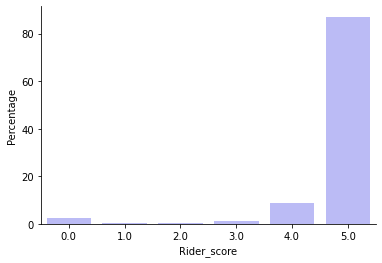

In [27]:
ax = sns.barplot(x = 'rider_score', y = 'percentage', data=rider_score_counts, color='blue', alpha=0.3)
ax.set(xlabel='Rider_score', ylabel='Percentage')
sns.despine()  # убрать часть рамки графика
plt.show()

# Клиенты

In [34]:
user_data = pd.read_csv('https://stepik.org/media/attachments/lesson/360348/user_data.csv')
logs = pd.read_csv('https://stepik.org/media/attachments/lesson/360348/logs.csv')
display(user_data.head())
display(logs.head())

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [90]:
grouppp = logs.groupby('client').agg({'success':'sum'})
grouppp[grouppp['success'] == 41].index
grouppp

,success
client,
40,1
50,1
75,1
81,1
132,1
...,...
99927,1
99931,1
99952,0


In [52]:
logs[logs['success'] == True].groupby('platform').count()[['client']]

,client
platform,
computer,1090
phone,2019
tablet,180


In [69]:
m = logs.merge(user_data, on = 'client')
m[m['premium'] == True].groupby('platform').count()[['client']]

,client
platform,
computer,150
phone,246
tablet,24


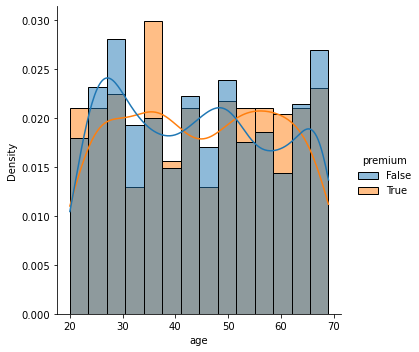

In [83]:
sns.displot(data = m, x='age', hue = 'premium', kde = True, stat = 'density', common_norm = False, bins = 14)

<AxesSubplot:xlabel='success', ylabel='count'>

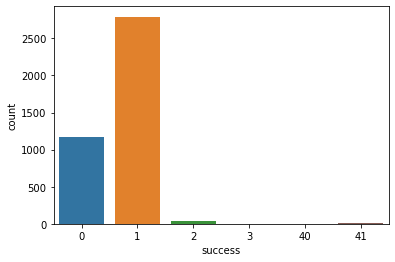

In [98]:
sns.countplot(data = grouppp, x = 'success')

C:\Users\Yana\AppData\Local\Temp/ipykernel_10140/1593486397.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  m[m['success'] == True][m['platform'] == 'computer'].groupby('age').agg({'client':'count'}).plot(kind = 'bar')


<AxesSubplot:xlabel='age'>

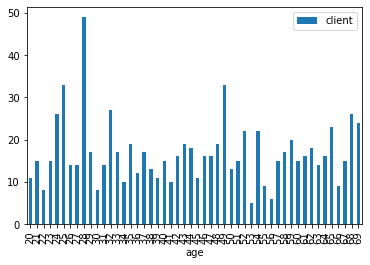

In [122]:
m[m['success'] == True][m['platform'] == 'computer'].groupby('age').agg({'client':'count'}).plot(kind = 'bar')